In [1]:
# Reload modules automatically
# https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
from utils import ExperimentManager
import matplotlib.pyplot as plt

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman"
})

In [4]:
label_fontsize = 29
legend_fontsize = 16 #18
ticks_fontsize = 16 #18
use_custom_legend = True
linewidth = 1.5
markersize = 6
capsize = 6
framealpha = 0.5

In [9]:
gcn_test_bd_exp = dict(
    label = "GCN",
    collection = "m_sbm_cert_backdoor_gcn",
    start_id = 246,
    end_id = 490,
    n_seeds = 5,
)
appnp_test_bd_exp = dict(
    label = "APPNP_alpha0.2",
    relabel = "APPNP",
    collection = "m_sbm_cert_backdoor_appnp",
    start_id = 1961,
    end_id = 2205,
    n_seeds = 5,
)
appnp_alpha1_test_bd_exp = dict(
    label = "APPNP_alpha1",
    collection = "m_sbm_cert_backdoor_appnp",
    start_id = 2696,
    end_id = 2940,
    n_seeds = 5,
)
sgc_test_bd_exp = dict(
    label = "SGC",
    collection = "m_sbm_cert_backdoor_sgc",
    start_id = 246,
    end_id = 490,
    n_seeds = 5,
)
gcn_skippc_linear_test_bd_exp = dict(
    label = "GCN_skippc_linear",
    collection = "m_sbm_cert_backdoor_gcn_skippc",
    start_id = 246,
    end_id = 490,
    n_seeds = 5,
)
gcn_skipalpha_linear_alpha01_test_bd_exp = dict(
    label = "GCN_skipalpha_linear",
    relabel = "GCN_skipalpha_linear_alpha0.1",
    collection = "m_sbm_cert_backdoor_gcn_skipalpha",
    start_id = 491,
    end_id = 735,
    n_seeds = 5,
)
gcn_skipalpha_linear_alpha02_test_bd_exp = dict(
    label = "GCN_skipalpha_linear",
    relabel = "GCN_skipalpha_linear_alpha0.2",
    collection = "m_sbm_cert_backdoor_gcn_skipalpha",
    start_id = 736,
    end_id = 980,
    n_seeds = 5,
)
gin_test_bd_exp = dict(
    label = "GIN",
    collection = "m_sbm_cert_bu",
    start_id = 1,
    end_id = 245,
    n_seeds = 5,
)
gsage_test_bd_exp = dict(
    label = "GraphSAGE",
    collection = "m_sbm_cert_bu",
    start_id = 246,
    end_id = 490,
    n_seeds = 5,
)
K = 1.5
attack_nodes = "test_backdoor"
delta_l = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
n_adv_l = [1, 2, 6, 12, 24, 60, 120]

In [10]:
experiments = [gcn_test_bd_exp, sgc_test_bd_exp, appnp_test_bd_exp, appnp_alpha1_test_bd_exp,
               gcn_skippc_linear_test_bd_exp, gin_test_bd_exp, 
               gcn_skipalpha_linear_alpha01_test_bd_exp, gcn_skipalpha_linear_alpha02_test_bd_exp,
               gsage_test_bd_exp]
experiment_manager = ExperimentManager(experiments)

GCN No. of experiments 49
SGC No. of experiments 49
APPNP_alpha0.2 No. of experiments 49
APPNP_alpha1 No. of experiments 49
GCN_skippc_linear No. of experiments 49
GIN No. of experiments 49
GCN_skipalpha_linear No. of experiments 49
GCN_skipalpha_linear No. of experiments 49
GraphSAGE No. of experiments 49


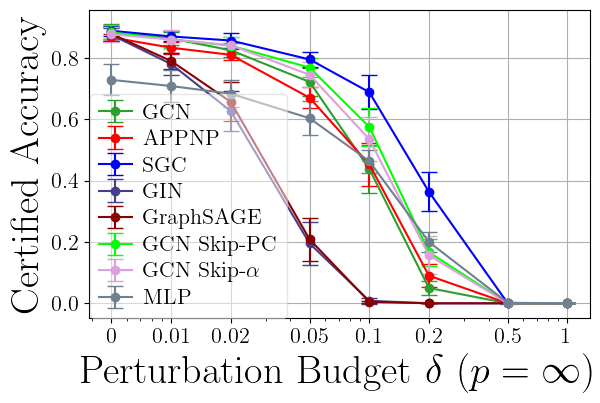

In [11]:
C_l = [0.01]
models = ["GCN","APPNP", "SGC", 
          "GIN", "GraphSAGE",
           "GCN_skippc_linear",
          "GCN_skipalpha_linear_alpha0.2", "APPNP_alpha1"]
legend_labels = ["GCN","APPNP", "SGC", 
            "GIN", "GraphSAGE",
           "GCN Skip-PC",
          "GCN Skip-$\\alpha$", "MLP"]
n_adv_plot = 24
pert_model = "linf"
savefig = f'csbm_attack{attack_nodes}_C{C_l[0]}_adv{n_adv_plot}_{pert_model}.pdf'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, 
                                         legend_labels=legend_labels, xlogscale=True, 
                                         savefig=savefig,
                                         label_fontsize=label_fontsize,
                              legend_fontsize=legend_fontsize,
                              ticks_fontsize=ticks_fontsize,
                              markersize=markersize,
                              capsize=capsize,
                              linewidth=linewidth,
                              framealpha=framealpha,
                              use_custom_legend=use_custom_legend,
                              pert_model=pert_model)

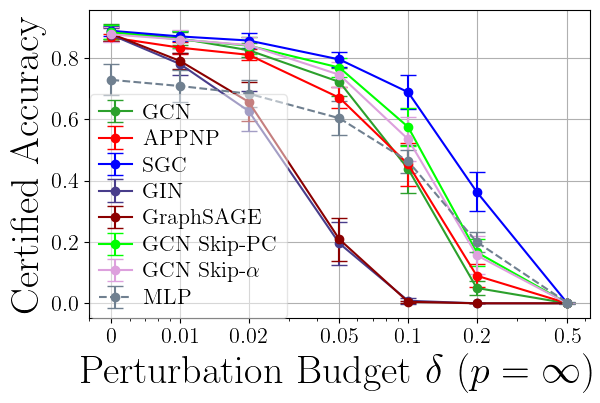

In [13]:
C_l = [0.01]
models = ["GCN","APPNP", "SGC", 
          "GIN", "GraphSAGE",
           "GCN_skippc_linear",
          "GCN_skipalpha_linear_alpha0.2", "APPNP_alpha1"]
legend_labels = ["GCN","APPNP", "SGC", 
            "GIN", "GraphSAGE",
           "GCN Skip-PC",
          "GCN Skip-$\\alpha$", "MLP"]
n_adv_plot = 24
delta_l = [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]
pert_model = "linf"
savefig = f'csbm_del{delta_l[-1]}_attack{attack_nodes}_C{C_l[0]}_adv{n_adv_plot}_{pert_model}.pdf'
experiment_manager.plot_robust_acc_delta(K, models, C_l, attack_nodes, 
                                         n_adv=n_adv_plot, delta_l=delta_l, 
                                         legend_labels=legend_labels, xlogscale=True, 
                                         savefig=savefig,
                                         label_fontsize=label_fontsize,
                              legend_fontsize=legend_fontsize,
                              ticks_fontsize=ticks_fontsize,
                              markersize=markersize,
                              capsize=capsize,
                              linewidth=linewidth,
                              framealpha=framealpha,
                              use_custom_legend=use_custom_legend,
                              pert_model=pert_model)